In [1]:
from pathlib import Path
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
path = Path('/media/kevin/data_4t/Test/benchmark_database')
file = [*path.glob('*')]
file

[PosixPath('/media/kevin/data_4t/Test/benchmark/database_benchmark.csv'),
 PosixPath('/media/kevin/data_4t/Test/benchmark/ip.index'),
 PosixPath('/media/kevin/data_4t/Test/benchmark/index.json'),
 PosixPath('/media/kevin/data_4t/Test/benchmark/array'),
 PosixPath('/media/kevin/data_4t/Test/benchmark/model_benchmark.csv')]

In [3]:
df_model = (
    pl.read_csv(path / 'model_benchmark.csv')
    .with_columns((pl.col('per_sec') / pl.col('per_sec').min()).alias('per_sec_pct'))
)
df_model

name,time,data_size,embed_size,per_sec,per_sec_pct
str,f64,i64,i64,f64,f64
"""jina""",157.894894,72110,1024,456.696212,1.0
"""bge""",119.295163,72110,1024,604.46709,1.323565


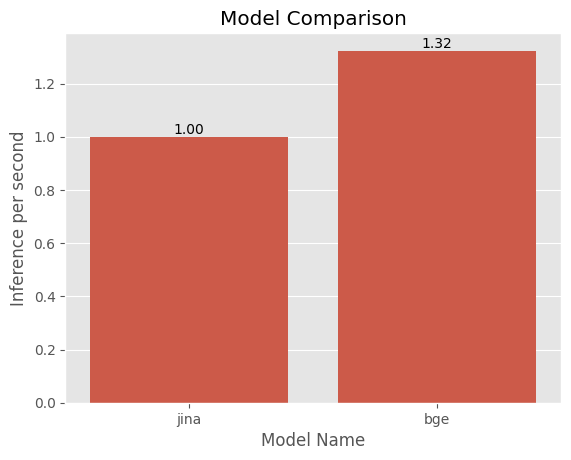

In [4]:
ax = sns.barplot(data=df_model, x='name', y='per_sec_pct')
ax.set(xlabel='Model Name', ylabel='Inference per second', title='Model Comparison')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

In [8]:
df_db = (
    pl.read_csv(path / 'database_benchmark.csv')
    .with_columns(
        (pl.col('time_index') / pl.col('time_index').min()).alias('time_index_pct'),
        (pl.col('time_query') / pl.col('time_query').min()).alias('time_query_pct'),
    )
)
df_db

name,time_index,time_query,data_size,time_index_pct,time_query_pct
str,f64,f64,str,f64,f64
"""faiss""",30.779389,215.631517,"""(72110, 1024)""",2.006409,2.825147
"""milvus""",15.340538,76.32578,"""(72110, 1024)""",1.0,1.0


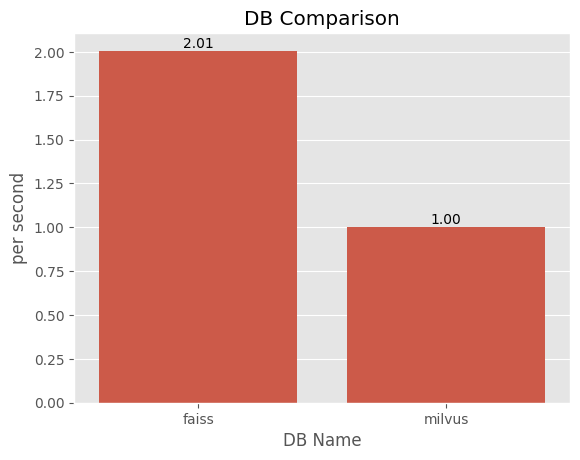

In [10]:
ax = sns.barplot(data=df_db, x='name', y='time_index_pct')
ax.set(xlabel='DB Name', ylabel='per second', title='DB Comparison')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

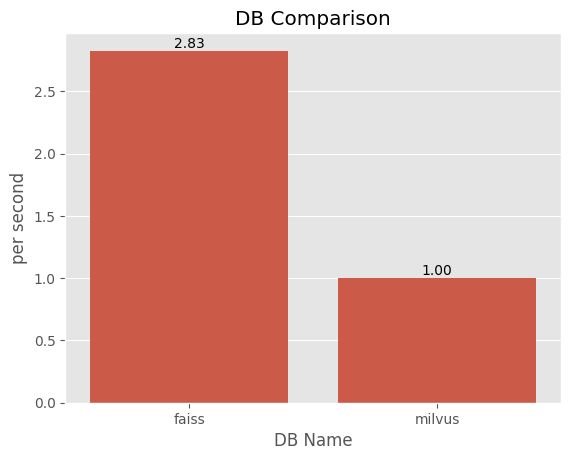

In [11]:
ax = sns.barplot(data=df_db, x='name', y='time_query_pct')
ax.set(xlabel='DB Name', ylabel='per second', title='DB Comparison')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')